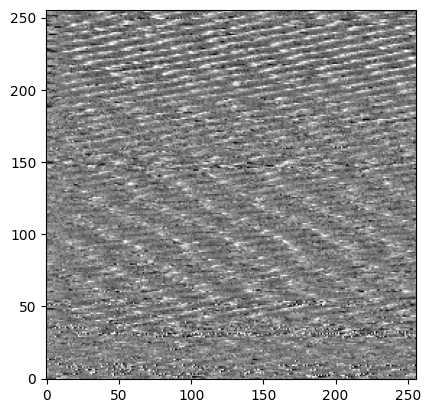

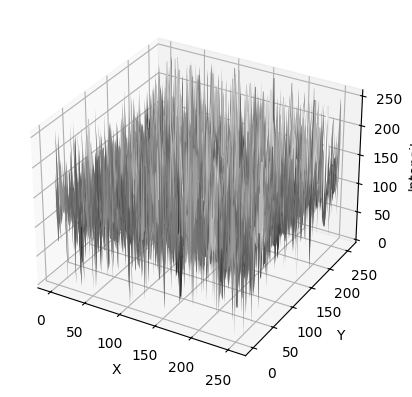

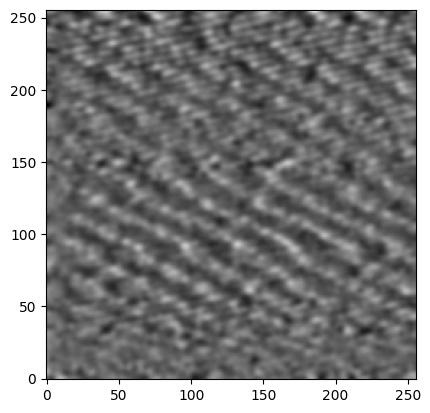

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def decode(data_path,size):
    with open(data_path, 'rb') as f:
        # Read the first 256 bytes to get the header information
        f.seek(- size[0] * size[1], 2)
        # Read the grayscale image data
        image_data = f.read(size[0] * size[1])
        # Convert the ata to a NumPy array and reshape it into a 256x256 image
        grayscale_image = np.frombuffer(image_data, dtype=np.uint8).reshape((size[0], size[1]))
    return grayscale_image


data_path = 'TI=50;Vb=1000;Vx=1;vy=0.4;gain=20.stm'

decode(data_path, (256, 256))
# Display the image using matplotlib
plt.imshow(grayscale_image, cmap='gray', origin='lower')


# Create a figure for the 3D surface plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate X and Y coordinates
x = np.arange(grayscale_image.shape[1])
y = np.arange(grayscale_image.shape[0])
x, y = np.meshgrid(x, y)

# Plot the surface
ax.plot_surface(x, y, grayscale_image, cmap='gray')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')

plt.show()

